In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/utra hacks/Stress-Lysis.csv')

In [4]:
df.shape

(2001, 4)

**Check if dataset is balanced**

In [5]:
print('Proportion of Each Level of Stress')
df['Stress Level'].value_counts().astype(float).apply(lambda x: x/df.shape[0])

Proportion of Each Level of Stress


1    0.394803
2    0.354823
0    0.250375
Name: Stress Level, dtype: float64

In [159]:
x1 = np.random.uniform(4, 8, [20,2])
x2 = np.random.uniform(1, 3, [20,2])
x3 = np. random.uniform(10, 14, [20, 2])

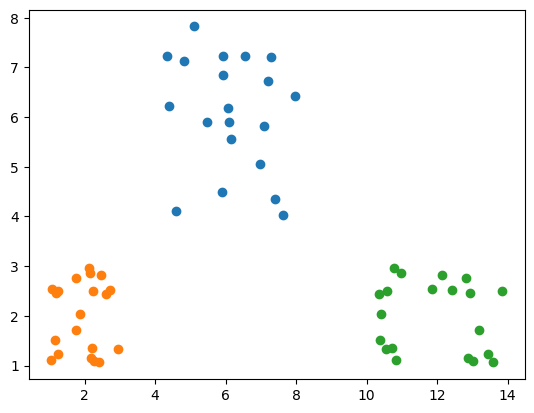

In [171]:
plt.scatter(x1[:, 0], x1[:, 1])
plt.scatter(x2[:, 0], x2[:, 1])
plt.scatter(x3[:, 0], x2[:, 1])
plt.show()

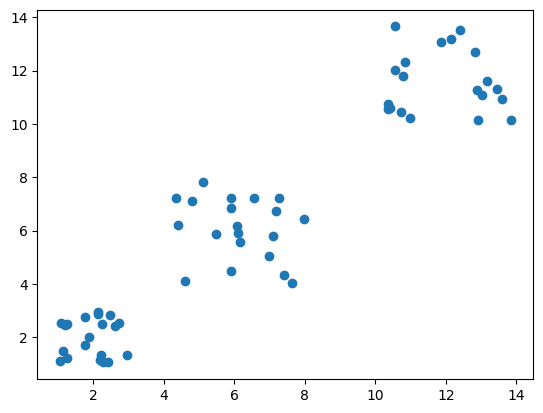

array([[12.13528255, 13.16892232],
       [10.36702211, 10.74443331],
       [12.87408096, 11.25097649],
       [10.5661502 , 13.64928303],
       [10.82712925, 12.32023071],
       [10.7151966 , 10.43304526],
       [10.77153412, 11.78173697],
       [10.98065428, 10.22068183],
       [13.83895044, 10.15379728],
       [10.55843147, 12.01132684],
       [11.86028024, 13.06720928],
       [12.41111081, 13.51119585],
       [13.58951217, 10.94170595],
       [13.01063849, 11.07818445],
       [12.91724265, 10.13256861],
       [13.17704124, 11.62119197],
       [13.43722922, 11.3079449 ],
       [10.34437625, 10.54262296],
       [12.82075328, 12.68900633],
       [10.41696583, 10.61041823]])

In [173]:
x = np.vstack((x1, x2, x3))
plt.scatter(x[:,0], x[:,1])
plt.show()
x3

In [81]:
x.max()

13.757911683499326

In [27]:
def k_mean(x, num_class, num_init, iter):

    outputs = []

    for initialization in range(num_init):
        output = []
        centroids = np.array(np.random.uniform(x.min(), x.max(), (num_class, x.shape[1])))
        point_assign = [-1 for i in range(x.shape[0])]

        for iteration in range(iter):
            dist = np.array([[np.linalg.norm(centroid-data) for centroid in centroids] for data in x])

            for data in range(x.shape[0]):
                for cls in range(num_class):
                    if point_assign[data] == -1:
                        point_assign[data] = cls
                    elif dist[data, cls] < dist[data, point_assign[data]]:
                        point_assign[data] = cls

            # plt.scatter(x[:,0], x[:,1])
            # plt.scatter(centroids[:,0], centroids[:,1], color='cyan')
            # plt.show()

            new_centroids = np.zeros((num_class, x.shape[1]))

            for i in range(len(point_assign)):
                new_centroids[point_assign[i], :] += x[i,:]

            for i in range(num_class):
                new_centroids[i, :] /= point_assign.count(i)

            new_centroids = np.array(new_centroids)
            centroids = new_centroids.copy()

        output.append(centroids)
            # plt.scatter(x[:,0], x[:,1])
            # plt.scatter(new_centroids[:,0], new_centroids[:,1], color='cyan')
            # plt.show()

        return output


In [28]:
k_mean(x, 3, 3, 5)

[array([[         nan,          nan,          nan],
        [ 14.8965528 ,  83.8965528 ,  47.86231884],
        [ 24.76321739,  93.76321739, 148.9352657 ]])]